<a href="https://colab.research.google.com/github/cicbeast/LSDSPT1-First-Project/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Let's do our imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from google.colab import files
import io
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [0]:
# The dataset was downloaded from Kaggle.com and uploaded to github for ease of use
df = pd.read_csv('https://github.com/cicbeast/LSDSPT1-First-Project/blob/master/tipsters.csv?raw=true')
df.head(10)

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,Tipster A,24/07/2015,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,Tipster A,24/07/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,Tipster A,24/07/2015,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,Tipster A,24/07/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,Tipster A,25/07/2015,Ascot,Peril,Win,4.33,Win,True
5,6,6,Tipster A,25/07/2015,York,Aldreth,Win,6.00,Lose,True
6,7,7,Tipster A,25/07/2015,Newcastle,Niceonemyson,Win,6.00,Lose,True
7,8,8,Tipster A,25/07/2015,Lingfield,Brandon Castle,Win,6.00,Lose,True
8,9,9,Tipster A,26/07/2015,Carlisle,Sands Time,Win,5.50,Lose,True
9,10,10,Tipster A,26/07/2015,Pontefract,Ad Dabaran,Win,2.00,Lose,True


In [0]:
df.shape

(38248, 10)

In [0]:
df['Tipster'] = df['Tipster'].str[-2:]
df['Tipster'] = df['Tipster'].str.strip()
df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,A,24/07/2015,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,A,24/07/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,A,24/07/2015,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,A,24/07/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,A,25/07/2015,Ascot,Peril,Win,4.33,Win,True


In [0]:
# Let's get the dates in the universally accepted format
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,A,2015-07-24,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,A,2015-07-24,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,A,2015-07-24,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,A,2015-07-24,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,A,2015-07-25,Ascot,Peril,Win,4.33,Win,True


In [0]:
# Let's change the Odds format from decimal to percentages
# Let's also adjust the column name
df['Odds'] = (1 /df['Odds']) * 100
df['Odds'] = df['Odds'].round(2)
df.rename({'Odds': 'Odds (%)'}, axis=1, inplace=True)

df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive
0,1,1,A,2015-07-24,Ascot,Fredricka,Win,12.50,Lose,True
1,2,2,A,2015-07-24,Thirsk,Spend A Penny,Win,22.22,Lose,True
2,3,3,A,2015-07-24,York,Straightothepoint,Win,14.29,Lose,True
3,4,4,A,2015-07-24,Newmarket,Miss Inga Sock,Win,20.00,Lose,True
4,5,5,A,2015-07-25,Ascot,Peril,Win,23.09,Win,True


In [0]:
# Let's reformat the Result Column also
df['Result'] = df['Result'].replace(['Win','Lose'], [1,0])
df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive
0,1,1,A,2015-07-24,Ascot,Fredricka,Win,12.50,0,True
1,2,2,A,2015-07-24,Thirsk,Spend A Penny,Win,22.22,0,True
2,3,3,A,2015-07-24,York,Straightothepoint,Win,14.29,0,True
3,4,4,A,2015-07-24,Newmarket,Miss Inga Sock,Win,20.00,0,True
4,5,5,A,2015-07-25,Ascot,Peril,Win,23.09,1,True


In [0]:
df.groupby(['Tipster']).mean()

,UID,ID,Odds (%),Result,TipsterActive
Tipster,,,,,
A,666.0,666.000000,21.016912,0.369647,True
A1,31299.5,1223.408831,13.110809,0.138594,True
B,1583.0,252.000000,14.567396,0.170974,True
B1,33771.0,1249.110132,26.232315,0.274329,False
C,2703.5,869.500000,10.607946,0.245109,False
C1,35270.0,251.000000,16.593373,0.217565,False
D,3943.0,371.000000,7.731687,0.129555,True
D1,36580.0,1060.000000,6.874285,0.164228,True
E,6163.5,1850.500000,24.108762,0.253784,True


In [0]:
# We should make sure that none of our tipsters have insignificantly small data 
df.groupby(['Tipster']).count()['UID']

Tipster
A     1331
A1    2446
B      503
B1    2497
C     1738
C1     501
D      741
D1    2119
E     3700
E1     609
F      146
G      290
H      833
I      453
J     1937
K      246
L     1425
M      957
N      415
O     1094
P      581
Q     1552
R     1901
S      383
T     1332
U      383
V      406
W      994
X     4383
Y     1469
Z      883
Name: UID, dtype: int64

In [0]:
df.groupby(['Tipster']).mean()['Odds (%)']

Tipster
A     21.016912
A1    13.110809
B     14.567396
B1    26.232315
C     10.607946
C1    16.593373
D      7.731687
D1     6.874285
E     24.108762
E1    16.954384
F     15.189452
G      5.436517
H      9.416279
I     15.295298
J     10.702550
K     21.749472
L     14.455663
M     16.960575
N     16.309133
O      6.613985
P     17.322186
Q     14.087249
R     25.402525
S     13.765744
T      9.771119
U     11.592167
V     10.014877
W      9.713753
X     11.475469
Y     14.749108
Z     21.016512
Name: Odds (%), dtype: float64

In [0]:
df.groupby(['Tipster']).mean()['Odds (%)'].sort_values()

Tipster
G      5.436517
O      6.613985
D1     6.874285
D      7.731687
H      9.416279
W      9.713753
T      9.771119
V     10.014877
C     10.607946
J     10.702550
X     11.475469
U     11.592167
A1    13.110809
S     13.765744
Q     14.087249
L     14.455663
B     14.567396
Y     14.749108
F     15.189452
I     15.295298
N     16.309133
C1    16.593373
E1    16.954384
M     16.960575
P     17.322186
Z     21.016512
A     21.016912
K     21.749472
E     24.108762
R     25.402525
B1    26.232315
Name: Odds (%), dtype: float64

In [0]:
df.groupby(['Tipster']).groups.keys()

dict_keys(['A', 'A1', 'B', 'B1', 'C', 'C1', 'D', 'D1', 'E', 'E1', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

In [0]:
df.groupby(['Tipster']).mean()['Result']

Tipster
A     0.369647
A1    0.138594
B     0.170974
B1    0.274329
C     0.245109
C1    0.217565
D     0.129555
D1    0.164228
E     0.253784
E1    0.262726
F     0.280822
G     0.224138
H     0.104442
I     0.236203
J     0.163655
K     0.264228
L     0.165614
M     0.275862
N     0.303614
O     0.079525
P     0.208262
Q     0.155284
R     0.327722
S     0.206266
T     0.106607
U     0.198433
V     0.091133
W     0.102616
X     0.146475
Y     0.194010
Z     0.294451
Name: Result, dtype: float64

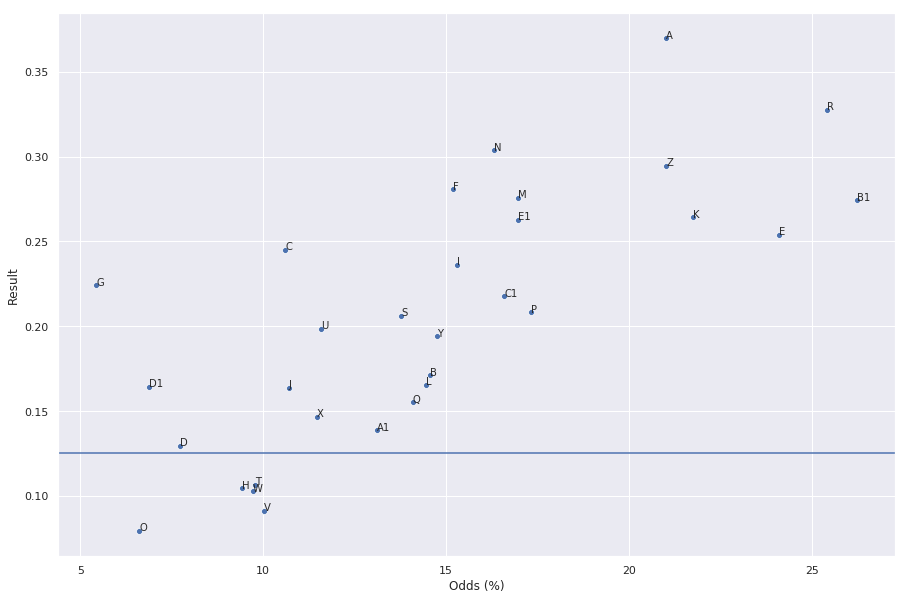

In [0]:
# Let's plot our Tipster's mean Odds and Results
tipsodds = df.groupby(['Tipster']).mean()['Odds (%)']
tipsresult = df.groupby(['Tipster']).mean()['Result']
tipsname = df.groupby(['Tipster']).groups.keys()
plt.figure(figsize=(15,10 ))
ax = sns.scatterplot(tipsodds, tipsresult, )
plt.axhline(.125, 0, 1)
# I also want to be able to see which Tipster is represented by each point
for i, txt in enumerate(tipsname):
    ax.annotate(txt, (tipsodds[i], tipsresult[i]))
# Now Let's plot a line for the betting at random


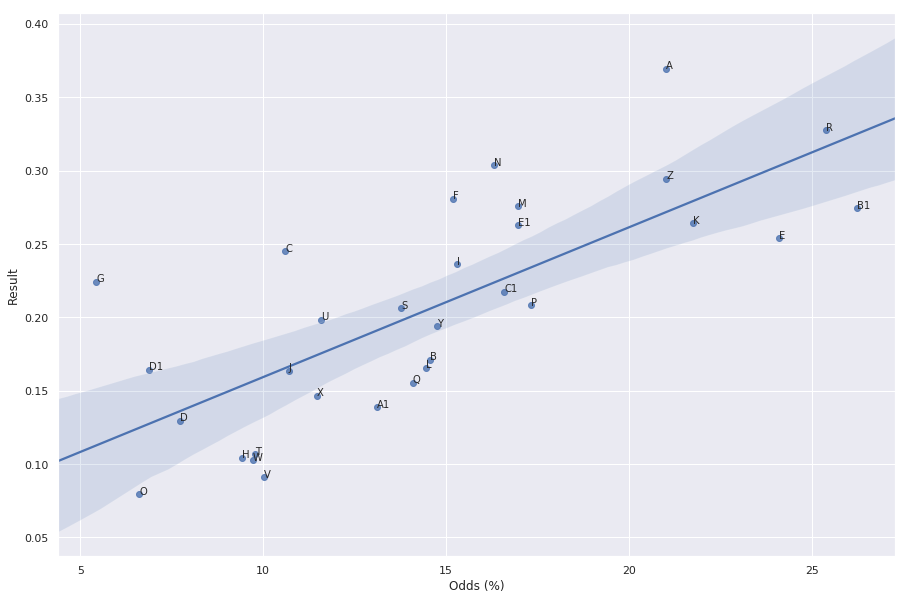

In [0]:
# Now let's plot see this plot with a regression line
plt.figure(figsize=(15,10 ))
ax = sns.regplot(x="Odds (%)", y="Result", data=df.groupby(['Tipster']).mean());

for i, txt in enumerate(tipsname):
    ax.annotate(txt, (tipsodds[i], tipsresult[i]))

In [0]:
# Let's Create a new column to to show potential winnings
df['$100 Bet wins:'] = 10000/df['Odds (%)']*df['Result']
df['$100 Bet wins:'] = df['$100 Bet wins:'].round(2)
df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive,$100 Bet wins:
0,1,1,A,2015-07-24,Ascot,Fredricka,Win,12.50,0,True,0.00
1,2,2,A,2015-07-24,Thirsk,Spend A Penny,Win,22.22,0,True,0.00
2,3,3,A,2015-07-24,York,Straightothepoint,Win,14.29,0,True,0.00
3,4,4,A,2015-07-24,Newmarket,Miss Inga Sock,Win,20.00,0,True,0.00
4,5,5,A,2015-07-25,Ascot,Peril,Win,23.09,1,True,433.09


In [0]:
# Now let's take a look at the means again
df.groupby(['Tipster']).mean()

,UID,ID,Odds (%),Result,TipsterActive,$100 Bet wins:
Tipster,,,,,,
A,666.0,666.000000,21.016912,0.369647,True,249.064763
A1,31299.5,1223.408831,13.110809,0.138594,True,144.378692
B,1583.0,252.000000,14.567396,0.170974,True,155.619980
B1,33771.0,1249.110132,26.232315,0.274329,False,107.521145
C,2703.5,869.500000,10.607946,0.245109,False,325.243861
C1,35270.0,251.000000,16.593373,0.217565,False,154.285230
D,3943.0,371.000000,7.731687,0.129555,True,203.165884
D1,36580.0,1060.000000,6.874285,0.164228,True,313.591454
E,6163.5,1850.500000,24.108762,0.253784,True,108.897576


<Figure size 1080x720 with 0 Axes>

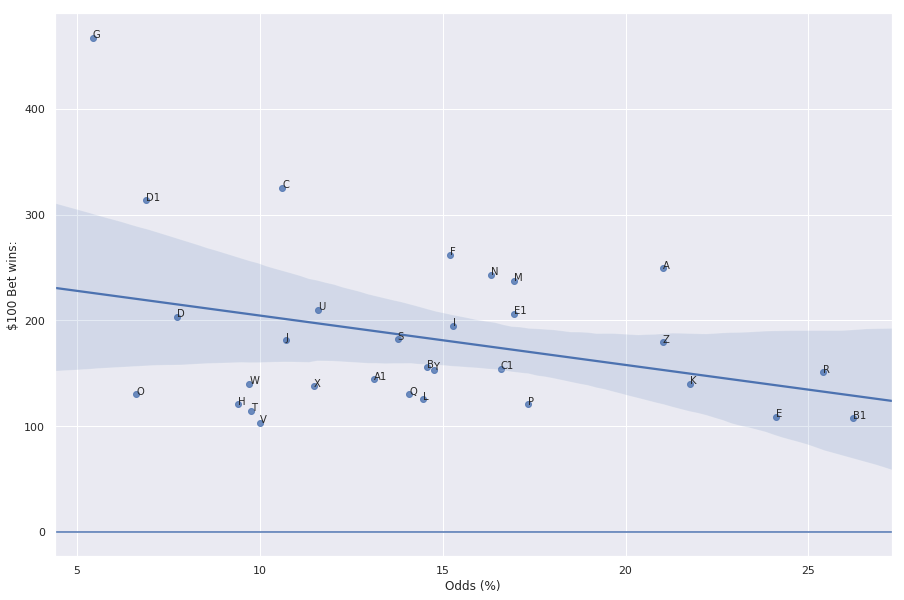

<Figure size 1080x720 with 0 Axes>

In [0]:
# Now let's plot Odds vs $100 Bet wins
# Let's plot our Tipster's mean Odds and Results
tipsodds = df.groupby(['Tipster']).mean()['Odds (%)']
tipswins = df.groupby(['Tipster']).mean()['$100 Bet wins:']
tipsname = df.groupby(['Tipster']).groups.keys()
plt.figure(figsize=(15,10 ))
ax = sns.regplot(x="Odds (%)", y="$100 Bet wins:", data=df.groupby(['Tipster']).mean());
plt.axhline(.125, 0, 1)
# I also want to be able to see which Tipster is represented by each point
for i, txt in enumerate(tipsname):
    ax.annotate(txt, (tipsodds[i], tipswins[i]))
# Now Let's plot a line for the betting at random
plt.figure(figsize=(15,10 ))



In [0]:
# Let's separate tipster A as an example
dfA = df[df['Tipster'] == 'A']
dfA = dfA.drop(['UID', 'ID'], axis=1)

dfA.tail(10)

,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive
1321,A,2016-04-09,Fontwell,Mysterious Man,Win,30.30,0,True
1322,A,2016-04-09,Dundalk,Sapphirine,Each Way,15.38,0,True
1323,A,2016-05-09,Galway,Cairdiuil,Each Way,20.00,1,True
1324,A,2016-05-09,Galway,Morga,Each Way,9.09,1,True
1325,A,2016-06-09,Redcar,Our Boy John,Each Way,16.67,0,True
1326,A,2016-06-09,Galway,Tocororo,Win,36.36,1,True
1327,A,2016-07-09,Uttoxeter,Skylander,Each Way,28.57,0,True
1328,A,2016-07-09,Doncaster,Andok,Win,80.00,1,True
1329,A,2016-07-09,Carlisle,Little Lady Katie,Each Way,6.25,0,True
1330,A,2016-07-09,Kempton,All the rage,Win,80.00,0,True


In [0]:
dftrack = df[df['Date'] == '2016-06-16']
dftrack[dftrack['Track'] == 'Ascot']

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive
1004,1005,1005,A,2016-06-16,Ascot,Blue De Vega,Each Way,16.67,0,True
1005,1006,1006,A,2016-06-16,Ascot,Clever Cookie,Each Way,7.69,0,True
1006,1007,1007,A,2016-06-16,Ascot,Pacodali,Each Way,1.96,0,True
1007,1008,1008,A,2016-06-16,Ascot,Defrocked,Each Way,9.09,1,True
1008,1009,1009,A,2016-06-16,Ascot,Shraaoh,Each Way,18.18,0,True
1573,1574,243,B,2016-06-16,Ascot,Fighting Temeraire,Win,7.69,0,True
3526,3527,1693,C,2016-06-16,Ascot,Legendary Lunch,Each Way,9.09,0,False
3527,3528,1694,C,2016-06-16,Ascot,Hawkbill,Each Way,12.50,1,False
3528,3529,1695,C,2016-06-16,Ascot,Sovereign Parade,Each Way,9.09,0,False
3529,3530,1696,C,2016-06-16,Ascot,Mustashry,Each Way,6.67,0,False


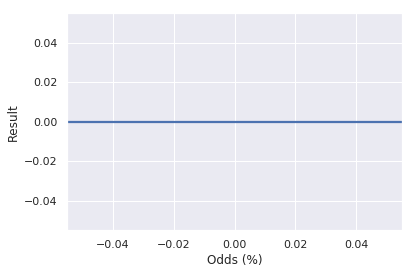

In [0]:
sns.regplot(x="Odds (%)", y="Result", data=dfA)

In [0]:
# df.groupby(['Tipster'] == ['Tipster A']).head()
df[df['Tipster'] == 'Tipster A'].head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


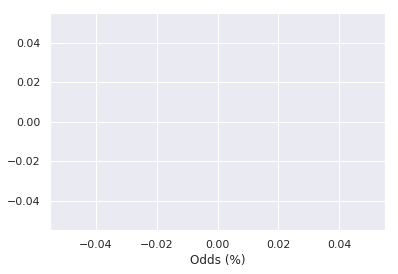

In [0]:
sns.distplot(dfA[dfA['Result']==0]['Odds (%)']);
sns.distplot(dfA[dfA['Result']==1]['Odds (%)']);

In [0]:
print(df['Track'].nunique())
print(df['Track'].unique())

116
['Ascot' 'Thirsk' 'York' 'Newmarket' 'Newcastle' 'Lingfield' 'Carlisle'
 'Pontefract' 'Uttoxeter' 'Hamilton' 'Chepstow' 'Salisbury' 'Catterick'
 'Chelmsford' 'Brighton' 'Wolverhampton' 'Newbury' 'Market Rasen'
 'Tramore' 'Leicester' 'Ffos Las' 'Worcester' 'Sandown' 'Deauville'
 'Curragh' 'Stratford' 'Goodwood' 'Beverley' 'Doncaster' 'Chester'
 'Leopardstown' 'Bath' 'Yarmouth' 'Ayr' 'Kempton' 'Haydock' 'Nottingham'
 'Dundalk' 'Sedgefield' 'Huntingdon' 'Wetherby' 'Wincanton' 'Fakenham'
 'Cork' 'Naas' 'Windsor' 'Exeter' 'Galway' 'Navan' 'Ludlow' 'Cheltenham'
 'Aintree' 'Listowel' 'Limerick' 'Plumpton' 'Warwick' 'Thurles'
 'Towcester' 'Musselburgh' 'Hexham' 'Taunton' 'Punchestown' 'Fontwell'
 'SouthWell' 'Fairyhouse' 'Bangor' 'Tipperary' 'Longchamp' 'Meydan'
 'Gowran Park' 'Cartmel' 'Down Royal' 'Kelso' 'Downpatrick' 'Ripon'
 'Epsom' 'Perth' 'Sligo' 'Ballinrobe' 'Clonmel' 'Auteuil' 'Kilbeggan'
 'Newton Abbot' 'Roscommon' 'Dundee' 'Killarney' 'Southwell' 'Bellewstown'
 'Redcar' 'Arlingt

In [0]:
print(df['Horse'].nunique())

15791


In [0]:
# df['Tipster'] = df['Tipster'].str.replace('Tipster ','Tipster_')

# df.head()

In [0]:
# for tip in tipdict1:
#   tipdict1[tip] = df[df['Tipster'] == tip]
  
#   Tipster_C.head()

In [0]:
# tipdict1 =  { "df"+uni[i][-1] : uni[i] for i in range(0, 26 ) }    
# tipdict2 =  { "df"+uni[j][-2:] : uni[j] for j in range(26, 31 ) }    

# tipdict1, tipdict2

In [0]:
# Let's try to find all of the active Tipsters
# First we'll separate them
dfact = df[df['TipsterActive']==True]
dfinact = df[df['TipsterActive']==False]

dfact.sample(10), dfinact.sample(10)

(         UID    ID Tipster  ... Odds (%) Result TipsterActive
 1083    1084  1084       A  ...    40.00      1          True
 27291  27292  3951       X  ...     7.69      0          True
 15857  15858    49       P  ...    12.50      0          True
 9453    9454   172       I  ...    19.23      0          True
 7658    7659  3346       E  ...    22.22      0          True
 19526  19527  1585       R  ...    14.29      0          True
 3573    3574     2       D  ...    10.00      1          True
 11542  11543  1808       J  ...     9.09      0          True
 601      602   602       A  ...    15.38      1          True
 19217  19218  1276       R  ...     9.09      0          True
 
 [10 rows x 10 columns],
          UID    ID Tipster  ... Odds (%) Result TipsterActive
 3101    3102  1268       C  ...     9.09      0         False
 9092    9093   644       H  ...     3.85      0         False
 16783  16784   394       Q  ...     4.76      0         False
 29529  29530   337       Z 

In [0]:
# Now let's find the specific tipsters
act_tip = dfact['Tipster'].unique()
inact_tip = dfinact['Tipster'].unique()

print('Active Tipsters: ', act_tip)
print('Inactive Tipsters: ', inact_tip)

Active Tipsters:  ['A' 'B' 'D' 'E' 'G' 'I' 'J' 'K' 'M' 'O' 'P' 'R' 'S' 'T' 'U' 'V' 'X' 'A1'
 'D1']
Inactive Tipsters:  ['C' 'F' 'H' 'L' 'N' 'Q' 'W' 'Y' 'Z' 'B1' 'C1' 'E1']


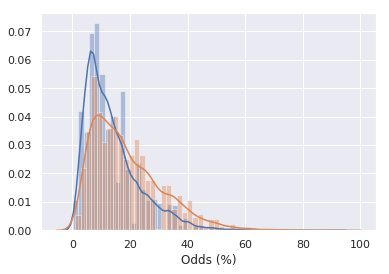

In [0]:
# sns.distplot(np.log10(dfact['Odds (%)']))
sns.distplot(dfact[dfact['Result']==0]['Odds (%)']);
sns.distplot(dfact[dfact['Result']==1]['Odds (%)']);

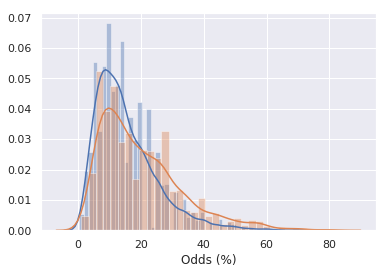

In [0]:
sns.distplot(dfinact[dfinact['Result']==0]['Odds (%)']);
sns.distplot(dfinact[dfinact['Result']==1]['Odds (%)']);

In [0]:
dfact['Result'].mean(), dfinact['Result'].mean()

(0.19554514412768997, 0.21114683815648447)

In [0]:
dfA['Result'].mean()

nan

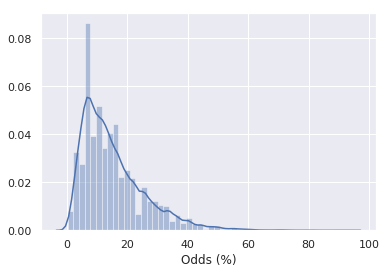

In [0]:
sns.distplot(df['Odds (%)'])

In [0]:
# Let's separate tipster A as an example
dfB = df[df['Tipster'] == 'Tipster B']

dfB.tail(10)

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds (%),Result,TipsterActive
